Pattersons D, also known as ABBA-BABA

In [3]:
%run ../scripts/notebook_settings.py

In [4]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")

In [13]:
chrom_number = "X"
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}".format(chrom_number)
ancestor = "/faststorage/project/baboondiversity/data/ancestral_state_panu3_23_04_2021/papio_anubis_ancestor_{}.fa".format(chrom_number)
fasta_sequences = SeqIO.parse(open(ancestor),'fasta')
for fasta in fasta_sequences:
    name, ancestral_sequence = fasta.id, str(fasta.seq)
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt = allel.GenotypeArray(callset["calldata/GT"])
ancestor_list = []
for i in callset["variants/POS"][:]:
    ancestor_list.append(ancestral_sequence[i-1].upper())
mapping = np.array([[0, 1]]*(len(ancestor_list)))
ens_eq_alt = (ancestor_list == callset["variants/ALT"][:, 0])
mapping[ens_eq_alt, 0] = 1
mapping[ens_eq_alt, 1] = 0
gt = gt.map_alleles(mapping)

In [5]:
g_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Gelada, Captive")].callset_index.values, axis=1).count_alleles(max_allele=1)
c_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Cynocephalus, Western Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
at_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
ae_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)

Checking number of fixed derived

In [33]:
gt_1 = g_gt
gt_2 = c_gt
print((gt_1[:,1] == max(gt_1[0])).sum(), (gt_2[:,1] == max(gt_2[0])).sum())
print((gt_1[:,1] == max(gt_1[0])).sum()/(gt_2[:,1] == max(gt_2[0])).sum())
print((gt_1[:,1] == max(gt_1[0])).sum()/len(gt_1), (gt_2[:,1] == max(gt_2[0])).sum()/len(gt_2))

621824 146902
4.232917182883828
0.1131032249908828 0.026719923897454367


Test run of pattersons D

In [35]:
allel.average_patterson_d(ae_gt, at_gt, c_gt, g_gt, blen=200000)

(0.03668886208756559,
 0.00571479027060781,
 6.419983997709064,
 array([ 0.05017886,  0.02604349,  0.07959185,  0.04439586,  0.05102975,
         0.02904733,  0.07640909,  0.02156721,  0.10021685,  0.05983958,
         0.02006108,  0.03065706,  0.02606431,  0.00325188, -0.02102752,
         0.08507698,  0.02198469,  0.07058022, -0.01284491,  0.010923  ,
        -0.02072962,  0.08145699,  0.03741384,  0.05966424,  0.02898341,
         0.01735572,  0.05362085]),
 array([0.03624879, 0.03749728, 0.03526062, 0.03666376, 0.03648235,
        0.0371778 , 0.03575167, 0.03746522, 0.03477626, 0.03585363,
        0.03762268, 0.03721146, 0.03737553, 0.03913675, 0.03876084,
        0.03558924, 0.03754206, 0.03565046, 0.03843214, 0.03788482,
        0.03857869, 0.03569169, 0.03689577, 0.0357531 , 0.03721347,
        0.03774661, 0.03648213]))

Going through all the combinations - some will be nonsensical, and will probably have extreme values

In [71]:
g_ac = gt.take(meta_data_samples.loc[meta_data_samples.C_origin == "Gelada, Captive"].callset_index.values, axis=1).count_alleles(max_allele=1)
def d_run(a, b, c):
    a_ids = meta_data_samples.loc[meta_data_samples.C_origin == a].callset_index.values
    b_ids = meta_data_samples.loc[meta_data_samples.C_origin == b].callset_index.values
    c_ids = meta_data_samples.loc[meta_data_samples.C_origin == c].callset_index.values
    a_ac = gt.take(a_ids, axis=1).count_alleles(max_allele=1)
    b_ac = gt.take(b_ids, axis=1).count_alleles(max_allele=1)
    c_ac = gt.take(c_ids, axis=1).count_alleles(max_allele=1)
    d_stats = allel.average_patterson_d(a_ac, b_ac, c_ac, g_ac, blen=100000)
    return d_stats

In [72]:
d_run('Cynocephalus, Western Tanzania', 'Anubis, Tanzania', 'Anubis, Ethiopia')

(-0.5568032998239841,
 0.011973432190821158,
 -46.50323240238751,
 array([-0.47196533, -0.52570409, -0.43525658, -0.50860516, -0.54576901,
        -0.61846808, -0.61919392, -0.54343227, -0.69211758, -0.59881867,
        -0.61956153, -0.54571553, -0.59897754, -0.66672801, -0.62746093,
        -0.54772662, -0.64094975, -0.6057339 , -0.48614933, -0.49820103,
        -0.54596622, -0.50589118, -0.47810812, -0.55318969, -0.62958458,
        -0.42574974, -0.30843046, -0.43074854, -0.59718109, -0.65404412,
        -0.70612274, -0.66648715, -0.54842598, -0.54008195, -0.51262218,
        -0.53584383, -0.64606657, -0.55876795, -0.5444864 , -0.47600541,
        -0.59377419, -0.48190191, -0.63526054, -0.66052506, -0.55882106,
        -0.57169824, -0.49760187, -0.42879788, -0.57087856, -0.59589112,
        -0.55325559, -0.56273248, -0.67218172, -0.71382837]),
 array([-0.56089576, -0.5594626 , -0.56155249, -0.55997636, -0.55909128,
        -0.5576264 , -0.55781631, -0.55911024, -0.55626083, -0.558087

In [78]:
origin_list = []
s_list = []
for origin in meta_data_samples.C_origin.unique():
    ss = meta_data_samples.loc[meta_data_samples.C_origin == origin]
    if len(ss) > 4 and origin != "Papio, Senegal" and origin != "Ursinus, Zambia":
        origin_list.append(origin)
        s_list.append(ss.Species.unique()[0])

In [79]:
a_l = []
b_l = []
c_l = []
dbranch_l = []
z_l = []

for i in range(len(origin_list)):
    for j in range(i):
        for x in origin_list:
            if x != origin_list[i] and x != origin_list[j]:
                d_stats = d_run(x, origin_list[i], origin_list[j])
                a_l.append(x)
                b_l.append(origin_list[i])
                c_l.append(origin_list[j])
                dbranch_l.append(d_stats[0])
                z_l.append(d_stats[2])
    print(i)
d = {"a": a_l, "b": b_l, "c": c_l, "d_stat": dbranch_l, "z-score": z_l}
df_f3 = pd.DataFrame(data=d)

0
1
2
3
4
5


Just to recap - negative values indicate gene flow from c to b, while positive values indicate flow from c to a.
Values close to 0 indicate that no gene flow has occured between c/d and a/b.
Therefore, only check observations with 1 sign of z-scores.
They will be symmetric, and which does not fit the known phylogeny.
The sign is the opposite of the canonical definition, but this is due to the calculation method implemented in scikit-allel.

In [80]:
df_f3.loc[df_f3["z-score"] < 0].sort_values(["z-score"])

,a,b,c,d_stat,z-score
52,"Cynocephalus, Central Tanzania","Anubis, Ethiopia","Anubis, Tanzania",-0.586513,-58.789670
53,"Kindae, Zambia","Anubis, Ethiopia","Anubis, Tanzania",-0.597344,-54.512451
48,"Cynocephalus, Central Tanzania","Anubis, Ethiopia","Hamadryas, Ethiopia",-0.467446,-49.257895
49,"Kindae, Zambia","Anubis, Ethiopia","Hamadryas, Ethiopia",-0.449542,-48.955326
55,"Cynocephalus, Western Tanzania","Anubis, Ethiopia","Anubis, Tanzania",-0.530008,-45.310923
51,"Cynocephalus, Western Tanzania","Anubis, Ethiopia","Hamadryas, Ethiopia",-0.422121,-42.709875
20,"Cynocephalus, Central Tanzania","Anubis, Tanzania","Hamadryas, Ethiopia",-0.423130,-39.270640
21,"Kindae, Zambia","Anubis, Tanzania","Hamadryas, Ethiopia",-0.402573,-38.093067
54,"Hamadryas, Ethiopia","Anubis, Ethiopia","Anubis, Tanzania",-0.382147,-33.002250
22,"Cynocephalus, Western Tanzania","Anubis, Tanzania","Hamadryas, Ethiopia",-0.369959,-32.718145


In [14]:
df_f3["z-score"].mean()

5.707044123719205

Running it for all chromosomes in the Anubis Tanzania, Anubis Ethiopia, Hamadryas Ethiopia configuration.

In [16]:
def d_run_chrom(a, b, c, chrom_number):
    #Opening data
    ancestor = "/faststorage/project/baboondiversity/data/ancestral_state_panu3_23_04_2021/papio_anubis_ancestor_{}.fa".format(chrom_number)
    zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}".format(chrom_number)
    fasta_sequences = SeqIO.parse(open(ancestor),'fasta')
    for fasta in fasta_sequences:
        name, ancestral_sequence = fasta.id, str(fasta.seq)
    callset = zarr.open_group(zarr_dir, mode="r")
    gt = allel.GenotypeArray(callset["calldata/GT"])
    #Polarization of gt
    ancestor_list = []
    for i in callset["variants/POS"][:]:
        ancestor_list.append(ancestral_sequence[i-1].upper())
    mapping = np.array([[0, 1]]*(len(ancestor_list)))
    ens_eq_alt = (ancestor_list == callset["variants/ALT"][:, 0])
    mapping[ens_eq_alt, 0] = 1
    mapping[ens_eq_alt, 1] = 0
    gt = gt.map_alleles(mapping)
    g_ac = gt.take(meta_data_samples.loc[meta_data_samples.C_origin == "Gelada, Captive"].callset_index.values, axis=1).count_alleles(max_allele=1)
    a_ids = meta_data_samples.loc[meta_data_samples.C_origin == a].callset_index.values
    b_ids = meta_data_samples.loc[meta_data_samples.C_origin == b].callset_index.values
    c_ids = meta_data_samples.loc[meta_data_samples.C_origin == c].callset_index.values
    a_ac = gt.take(a_ids, axis=1).count_alleles(max_allele=1)
    b_ac = gt.take(b_ids, axis=1).count_alleles(max_allele=1)
    c_ac = gt.take(c_ids, axis=1).count_alleles(max_allele=1)
    d_stats = allel.average_patterson_d(a_ac, b_ac, c_ac, g_ac, blen=100000)
    return d_stats

In [17]:
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
dbranch_l = []
z_l = []

for chrom in chromosome_numbers:
    d_stats = d_run_chrom("Anubis, Tanzania", "Anubis, Ethiopia", "Hamadryas, Ethiopia", chrom)
    dbranch_l.append(d_stats[0])
    z_l.append(d_stats[2])
    print(chrom)
d = {"d_stat": dbranch_l, "z-score": z_l, "chrom": chromosome_numbers}
df_d_aah = pd.DataFrame(data=d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
X


In [18]:
df_d_aah["chr_type"] = ["autosome"]*20+["chrX"]

In [30]:
df_d_aah

,d_stat,z-score,chrom,chr_type
0,-0.116903,-15.452708,1,autosome
1,-0.107715,-13.669258,2,autosome
2,-0.106159,-15.894883,3,autosome
3,-0.140632,-21.736847,4,autosome
4,-0.114713,-17.112460,5,autosome
5,-0.101599,-13.275655,6,autosome
6,-0.109842,-13.319836,7,autosome
7,-0.128353,-22.180162,8,autosome
8,-0.112728,-17.849226,9,autosome
9,-0.107194,-11.882384,10,autosome


<AxesSubplot:xlabel='z-score', ylabel='Count'>

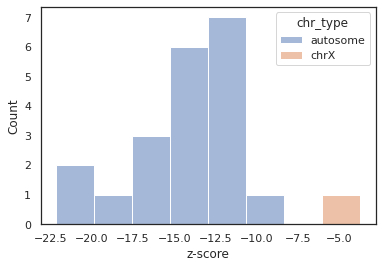

In [19]:
sns.histplot(df_d_aah, x="z-score", hue="chr_type")

<AxesSubplot:xlabel='d_stat', ylabel='z-score'>

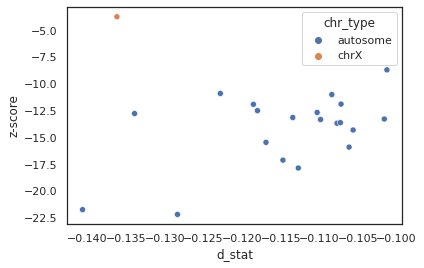

In [29]:
sns.scatterplot(data=df_d_aah, x="d_stat", y="z-score", hue="chr_type")

I want to be sure that no confounding happens due to males, so I restrict this part to females only (except for Gelada, which is 2 males)

In [5]:
meta_data_samples_f = meta_data_samples.loc[meta_data_samples.Sex == "F"]

In [8]:
def d_windowed_run_chrom(a, b, c, chrom_number):
    #Opening data
    ancestor = "/faststorage/project/baboondiversity/data/ancestral_state_panu3_23_04_2021/papio_anubis_ancestor_{}.fa".format(chrom_number)
    zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}".format(chrom_number)
    fasta_sequences = SeqIO.parse(open(ancestor),'fasta')
    for fasta in fasta_sequences:
        name, ancestral_sequence = fasta.id, str(fasta.seq)
    callset = zarr.open_group(zarr_dir, mode="r")
    gt = allel.GenotypeArray(callset["calldata/GT"])
    #Polarization of gt
    ancestor_list = []
    for i in callset["variants/POS"][:]:
        ancestor_list.append(ancestral_sequence[i-1].upper())
    mapping = np.array([[0, 1]]*(len(ancestor_list)))
    ens_eq_alt = (ancestor_list == callset["variants/ALT"][:, 0])
    mapping[ens_eq_alt, 0] = 1
    mapping[ens_eq_alt, 1] = 0
    gt = gt.map_alleles(mapping)
    #Removing sites in which a gelada is het
    gt_gelada = gt.take(meta_data_samples.loc[meta_data_samples.C_origin == "Gelada, Captive"].callset_index.values, axis=1)
    gt = gt.compress(gt_gelada.is_het().sum(axis=1) == 0)
    #Getting allele counts
    g_ac = gt.count_alleles(max_allele=1)
    a_ids = meta_data_samples_f.loc[meta_data_samples_f.C_origin == a].callset_index.values
    b_ids = meta_data_samples_f.loc[meta_data_samples_f.C_origin == b].callset_index.values
    c_ids = meta_data_samples_f.loc[meta_data_samples_f.C_origin == c].callset_index.values
    a_ac = gt.take(a_ids, axis=1).count_alleles(max_allele=1)
    b_ac = gt.take(b_ids, axis=1).count_alleles(max_allele=1)
    c_ac = gt.take(c_ids, axis=1).count_alleles(max_allele=1)
    d_stats = allel.moving_patterson_d(a_ac, b_ac, c_ac, g_ac, size=100000)
    return d_stats

In [9]:
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
df_list = []

for chrom in ["2", "7", "20", "X"]:
    print(chrom)
    chrom_df = pd.DataFrame()
    d_stats = d_windowed_run_chrom("Anubis, Tanzania", "Anubis, Ethiopia", "Hamadryas, Ethiopia", chrom)
    chrom_df["d"] = d_stats
    chrom_df["chrom"] = chrom
    if chrom == "X":
        chrom_df["chromtype"] = "X"
    else:
        chrom_df["chromtype"] = "autosome"
    chrom_df["window"] = [x+1 for x in range(len(chrom_df))]
    df_list.append(chrom_df)
window_d_df = pd.concat(df_list)

2
7
20
X


In [39]:
window_d_df.loc[window_d_df.chrom == "X"]["d"].mean()

-0.203059625666825

In [40]:
window_d_df.loc[window_d_df.chrom != "X"]["d"].mean()

-0.11417106422677116

<AxesSubplot:xlabel='d', ylabel='Count'>

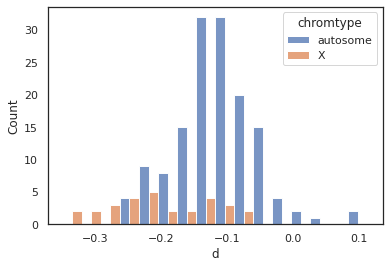

In [41]:
sns.histplot(window_d_df, x="d", hue="chromtype", multiple="dodge")

Implementing f^d from https://academic.oup.com/mbe/article/32/1/244/2925550#74386645
This just requires minimal modification from Pattersons D, which is that instead of having the denominator be the max freq of b or c.

In [33]:
def f_hat_d(aca, acb, acc, acd):
    a = aca.to_frequencies()[:, 1]
    b = acb.to_frequencies()[:, 1]
    c = acc.to_frequencies()[:, 1]
    d = acd.to_frequencies()[:, 1]
    num = (a - b) * (c - d)
    max_bc = np.maximum(b, c)
    den = (a + max_bc - (2 * a * max_bc)) * (max_bc + d - (2 * max_bc * d))

    return num, den

In [34]:
f_hat_est = f_hat_d(ae_gt, at_gt, c_gt, g_gt)

In [35]:
np.nansum(f_hat_est[0])/np.nansum(f_hat_est[1])

-0.016242646502747878

In [14]:
g_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Gelada, Captive")].callset_index.values, axis=1).count_alleles(max_allele=1)
c_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Cynocephalus, Western Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
at_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
ae_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)

In [46]:
gt_gelada = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Gelada, Captive")].callset_index.values, axis=1)

In [56]:
gt_no_het_gelada = gt.compress(gt_gelada.is_het().sum(axis=1) == 0)